In [1]:
# birdy client for communication with the server:
from birdy import WPSClient
# import birdy 

# handling files and folders
from os import path, listdir
from urllib import request
import time

# to display external png graphics in notebook: 
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# on serverside :
# conda activate finch 
# finch start -c etc/custom.cfg 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)

finch_server = 'http://localhost:8092/wps'   # finch 
finch_i = WPSClient(url=finch_server, progress=True)
finch = WPSClient(finch_server)

In [3]:
# read in the existing bias_adjusted tas files:
tasAj_path = '/home/nils/nap_niger/data/adjust/'
tasAj_files = [ tasAj_path+f for f in listdir(tasAj_path) if 'tasAdjust' in f]
tasAj_files.sort()

# read in the existing pr files (!!! not bias adjusted, so far !!!):
tas_path = '/home/nils/nap_niger/data/bbox/'
# lists all files stored in 'path'
tas_files = [ tas_path+f for f in listdir(tas_path) if 'tas_' in f]
tas_files.sort()

print(len(tasAj_files), len(tas_files) )

18 24


In [7]:
out = finch_i.tg_mean(tas=tas_files, freq='YS') #  tas=file2[0]

In [8]:
from metalink import download
tg_files = download.get(out.get()[2], path=tas_indices_path, segmented=False)

Metalink content-type detected.


In [19]:
# repeat calculation for files without bias adjustment

out = finch_i.tg_mean(tas=tasAj_files, freq='YS')

In [20]:
from metalink import download
tgAj_files = download.get(out.get()[2], path=tasAj_indices_path, segmented=False)

Metalink content-type detected.

Already downloaded tg_mean_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc.

Already downloaded tg_mean_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-20050101.nc.

Already downloaded tg_mean_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-20980101.nc.

Already downloaded tg_mean_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_GERICS-REMO2015_v1_day_20060101-20990101.nc.

Already downloaded tg_mean_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-20990101.nc.

Already downloaded tg_mean_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20060101-20990101.nc.

Already downloaded tg_mean_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc.

Already downloaded tg_mean_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-20050101.nc.

Already downloaded tg_mean_AFR-22_MPI-M-MPI-ESM-L

In [4]:
tas_indices_path = path.join(tas_path,'indices/')
tasAj_indices_path = path.join(tasAj_path,'indices/')

In [5]:
# or the manual way of reading in the files
tgAj_files = [ tasAj_indices_path+f for f in listdir(tasAj_indices_path) if 'tg' in f and '_day_' in f]
tgAj_files.sort()

tg_files = [ tas_indices_path+f for f in listdir(tas_indices_path) if 'tg' in f and '_day_' in f]
tg_files.sort()

print(len(tgAj_files), len(tg_files) )

18 24


In [6]:
out = fp_i.plot_spaghetti(tg_files, title='Sans ajustement des biais', figsize='10,6', ymin=295, ymax=308)

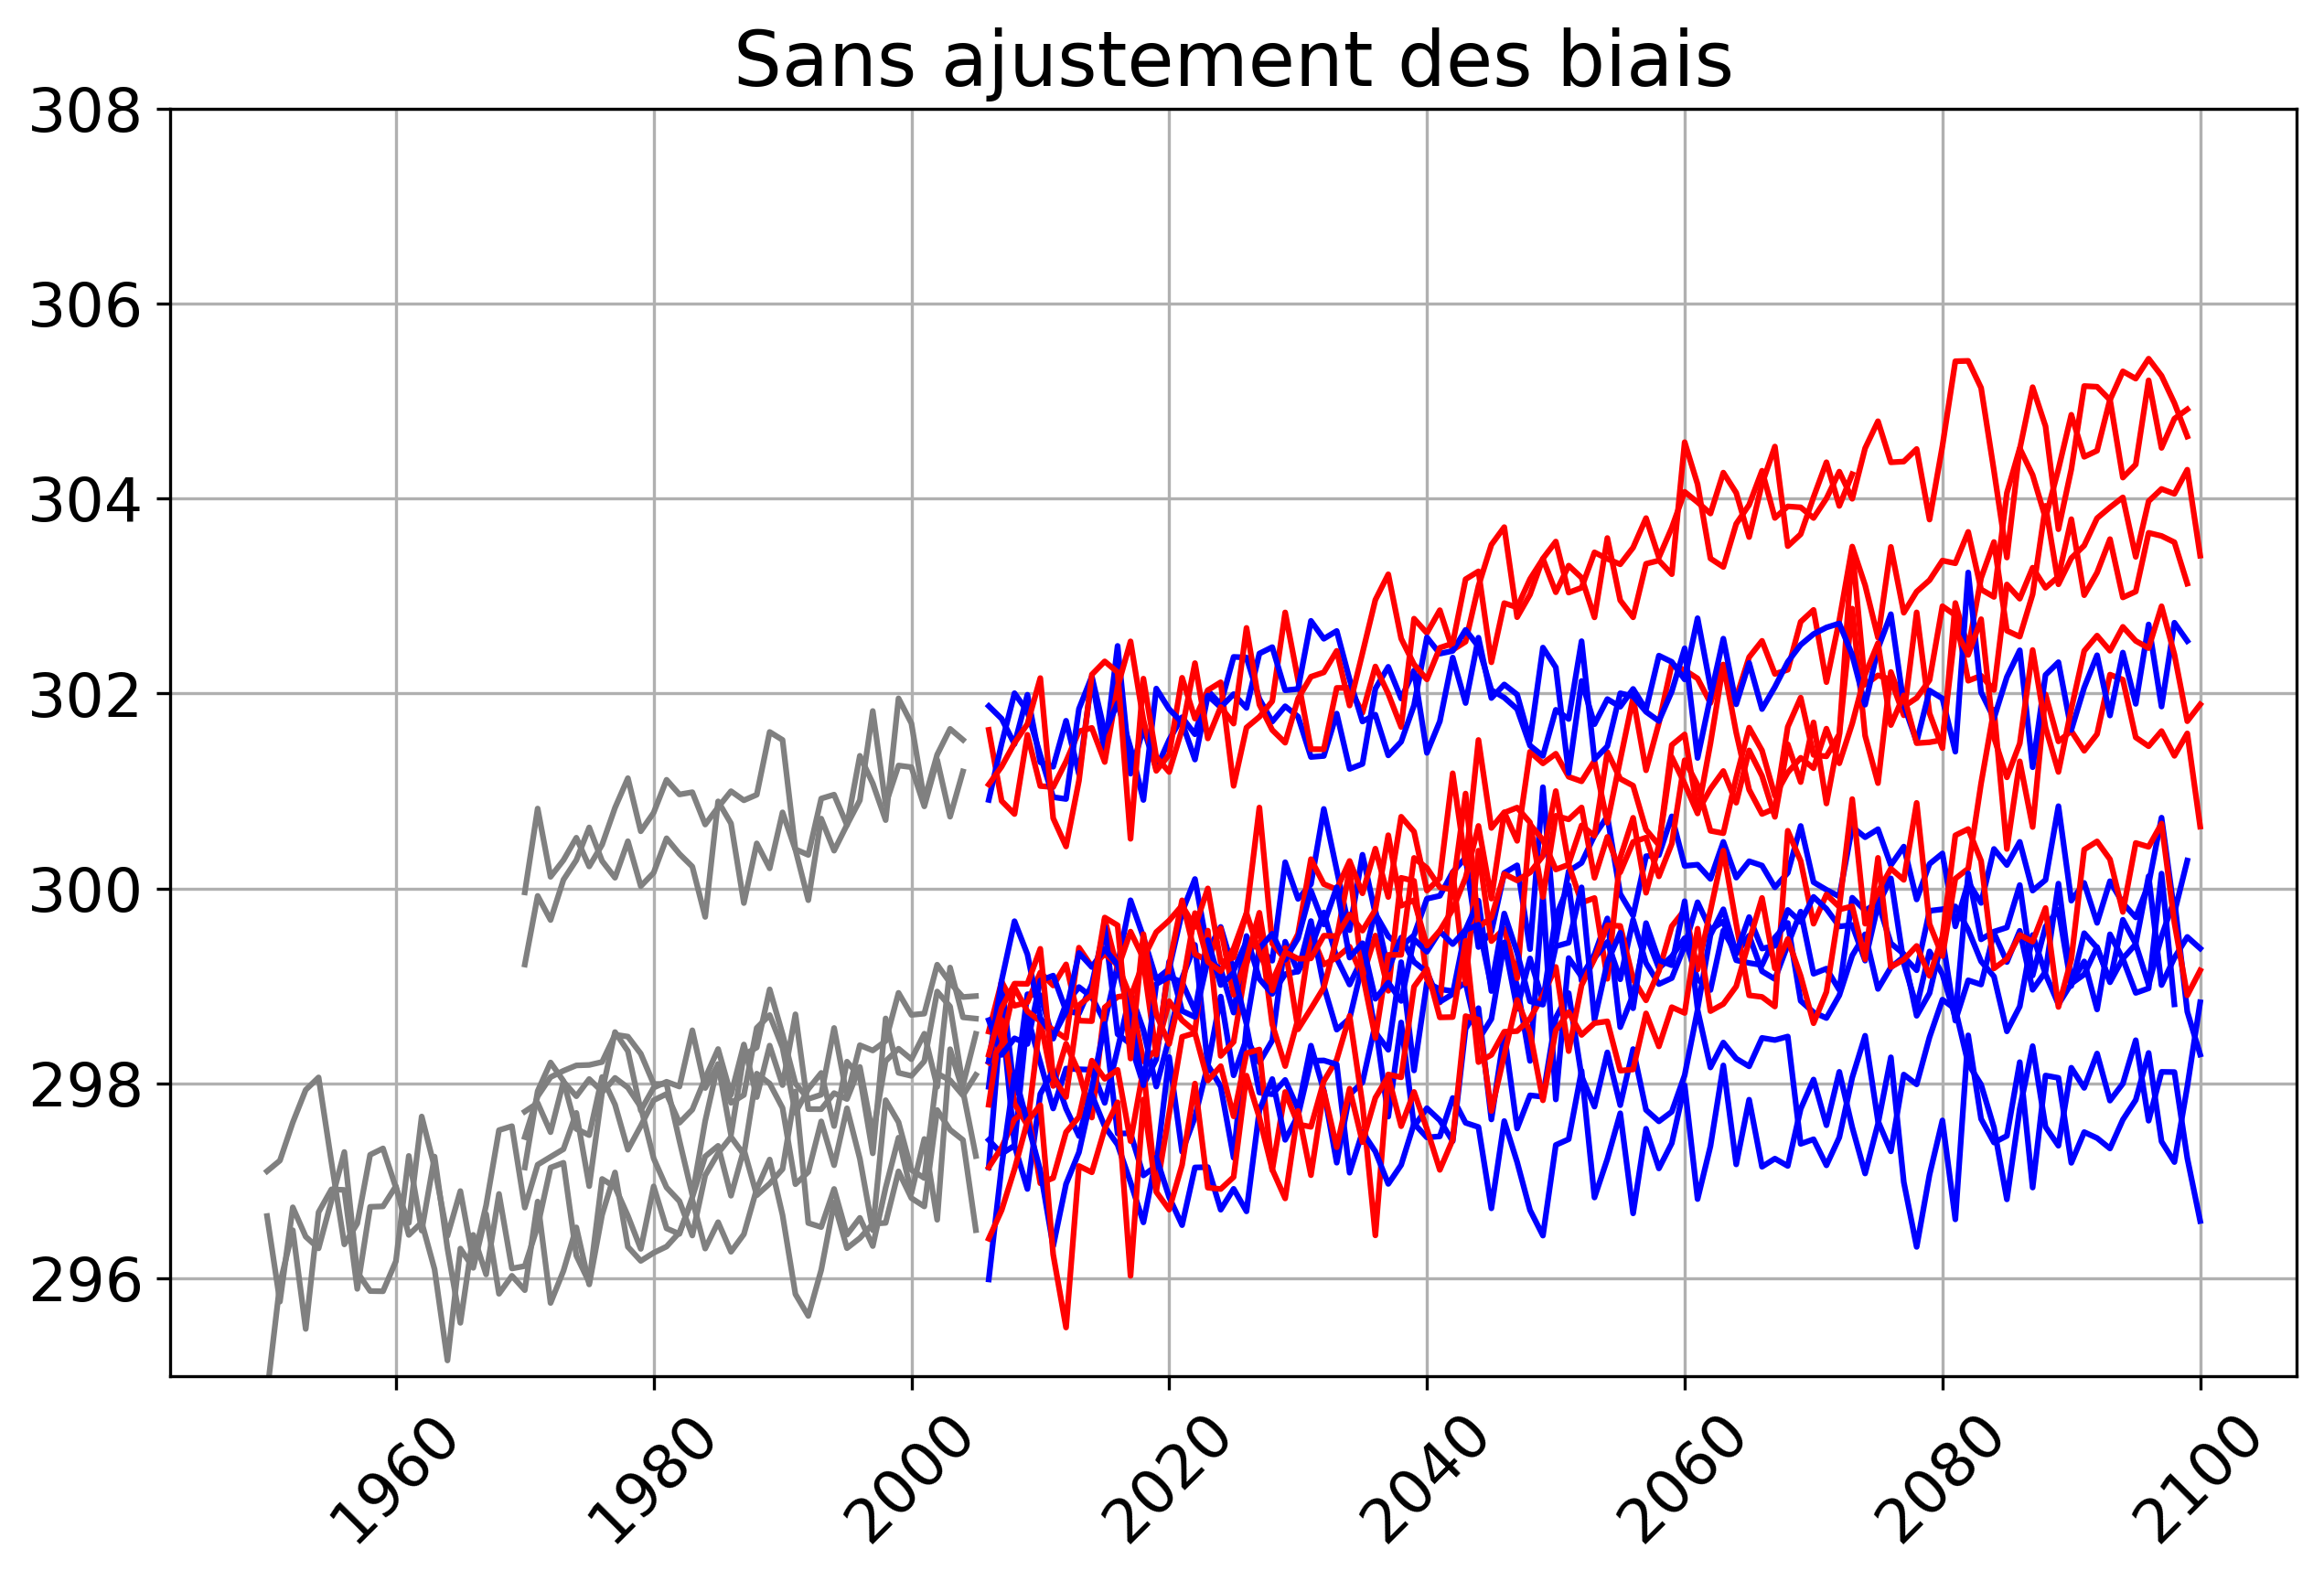

In [7]:
out_file = '/home/nils/nap_niger/pics/biasadjustment_sans.png'

request.urlretrieve(out.get()[0], out_file)
Image(out_file, width=600)

In [10]:
out = fp_i.plot_spaghetti(tgAj_files,  title='Avec ajustement des biais', figsize='10,6', ymin=295, ymax=308)

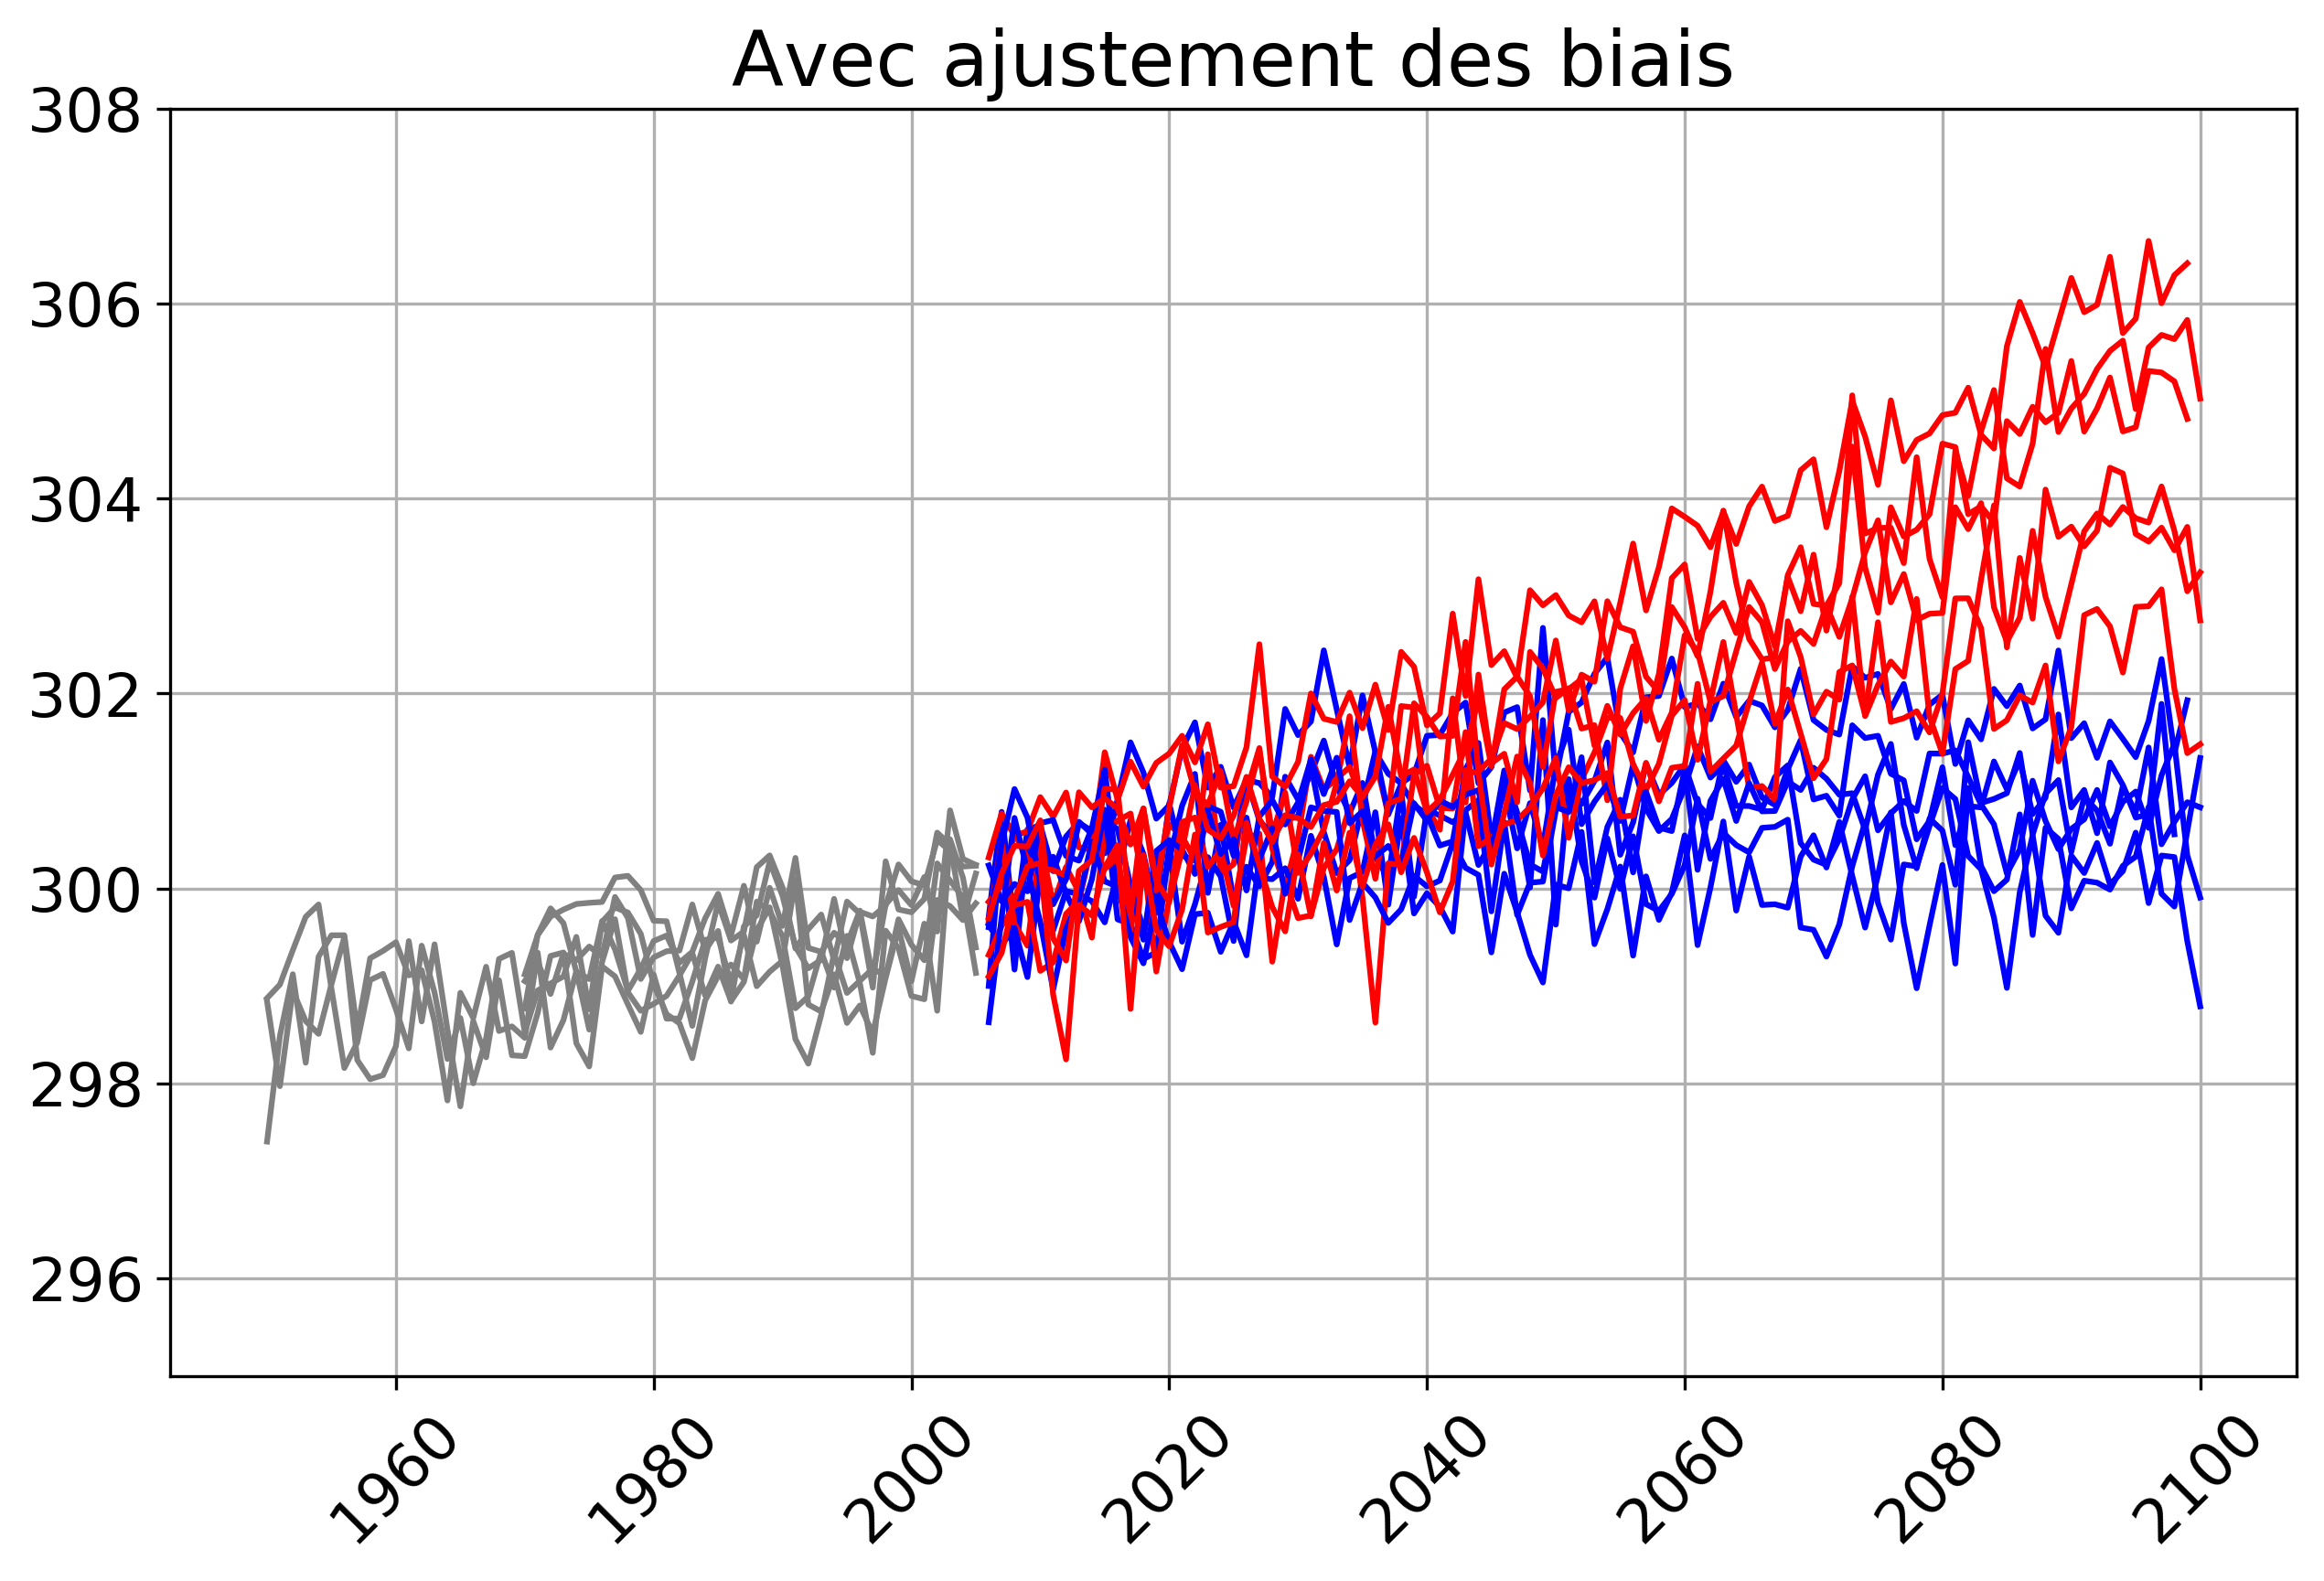

In [11]:
out_file = '/home/nils/nap_niger/pics/biasadjustment_avec.png'

request.urlretrieve(out.get()[0], out_file)
Image(out_file, width=600)